In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) # y labels are oh-encoded


/home/vaibhav/jupyter/kaal/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vaibhav/jupyter/kaal/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vaibhav/jupyter/kaal/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vaibhav/jupyter/kaal/lib/python3.6/site-packages/tensorflow/pyth

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


creating MNIST data set


In [2]:
n_train = mnist.train.num_examples  # 55,000
n_validation = mnist.validation.num_examples  # 5000
n_test = mnist.test.num_examples  # 10,000

DEFINE NEURAL NETWORK ARCHITECHTURE

In [3]:
n_input = 784  # input layer (28x28 pixels)
n_hidden1 = 512  # 1st hidden layer
n_hidden2 = 256  # 2nd hidden layer
n_hidden3 = 128  # 3rd hidden layer
n_output = 10  # output layer (0-9 digits)

In [4]:
learning_rate = 1e-4
n_iterations = 1000
batch_size = 128
dropout = 0.5

BUILDING TENSORFLOW GRAPH

In [5]:
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
keep_prob = tf.placeholder(tf.float32)

In [6]:
weights = {
    'w1': tf.Variable(tf.truncated_normal([n_input, n_hidden1], stddev=0.1)),
    'w2': tf.Variable(tf.truncated_normal([n_hidden1, n_hidden2], stddev=0.1)),
    'w3': tf.Variable(tf.truncated_normal([n_hidden2, n_hidden3], stddev=0.1)),
    'out': tf.Variable(tf.truncated_normal([n_hidden3, n_output], stddev=0.1)),
}

In [7]:
biases = {
    'b1': tf.Variable(tf.constant(0.1, shape=[n_hidden1])),
    'b2': tf.Variable(tf.constant(0.1, shape=[n_hidden2])),
    'b3': tf.Variable(tf.constant(0.1, shape=[n_hidden3])),
    'out': tf.Variable(tf.constant(0.1, shape=[n_output]))
}

In [8]:
layer_1 = tf.add(tf.matmul(X, weights['w1']), biases['b1'])
layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
layer_drop = tf.nn.dropout(layer_3, keep_prob)
output_layer = tf.matmul(layer_3, weights['out']) + biases['out']

In [9]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(
        labels=Y, logits=output_layer
        ))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



TRAINING AND TESTING

In [10]:
correct_pred = tf.equal(tf.argmax(output_layer, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [11]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [12]:
# train on mini batches
for i in range(n_iterations):
    batch_x, batch_y = mnist.train.next_batch(batch_size)
    sess.run(train_step, feed_dict={
        X: batch_x, Y: batch_y, keep_prob: dropout
        })

    # print loss and accuracy (per minibatch)
    if i % 100 == 0:
        minibatch_loss, minibatch_accuracy = sess.run(
            [cross_entropy, accuracy],
            feed_dict={X: batch_x, Y: batch_y, keep_prob: 1.0}
            )
        print(
            "Iteration",
            str(i),
            "\t| Loss =",
            str(minibatch_loss),
            "\t| Accuracy =",
            str(minibatch_accuracy)
            )
test_accuracy = sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1.0})
print("\n\nAccuracy on test set:", test_accuracy)

Iteration 0 	| Loss = 3.534122 	| Accuracy = 0.125
Iteration 100 	| Loss = 0.41298446 	| Accuracy = 0.859375
Iteration 200 	| Loss = 0.4790399 	| Accuracy = 0.8671875
Iteration 300 	| Loss = 0.591197 	| Accuracy = 0.8671875
Iteration 400 	| Loss = 0.38166773 	| Accuracy = 0.8984375
Iteration 500 	| Loss = 0.13475488 	| Accuracy = 0.9765625
Iteration 600 	| Loss = 0.17000675 	| Accuracy = 0.953125
Iteration 700 	| Loss = 0.34298018 	| Accuracy = 0.921875
Iteration 800 	| Loss = 0.26968652 	| Accuracy = 0.921875
Iteration 900 	| Loss = 0.34802413 	| Accuracy = 0.9140625


Accuracy on test set: 0.918


In [13]:
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

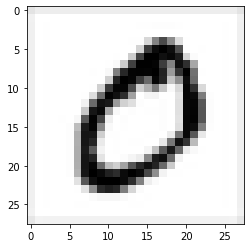

In [14]:
num_list=['0.png','1.png','2.png','3.png','4.png','5.png','6.png','7.png','8.png','9.png']
image=[]
image1=[]
for i in range(len(num_list)):
    img = np.invert(Image.open(num_list[i]).convert('L')).ravel()
    image.append(img)
    img1 = cv2.imread(num_list[i])
    image1.append(img1)
plt.imshow(image1[0])    

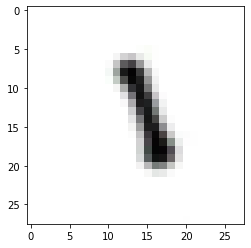

In [15]:
plt.imshow(image1[1])

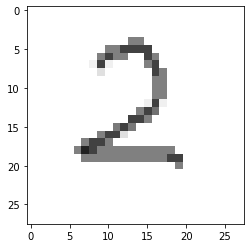

In [16]:
plt.imshow(image1[2])

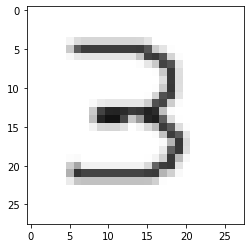

In [17]:
plt.imshow(image1[3])

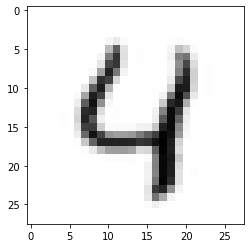

In [18]:
plt.imshow(image1[4])

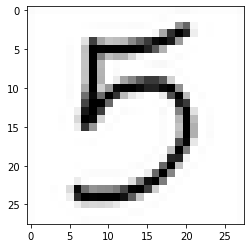

In [19]:
plt.imshow(image1[5])

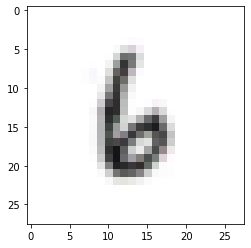

In [20]:
plt.imshow(image1[6])

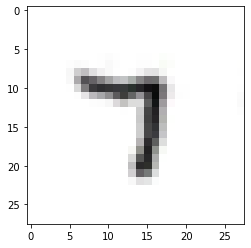

In [21]:
plt.imshow(image1[7])

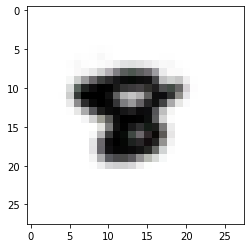

In [22]:
plt.imshow(image1[8])

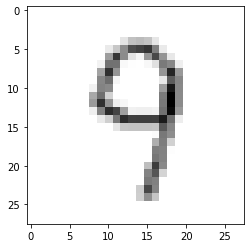

In [23]:
plt.imshow(image1[9])

In [25]:
for i in range(len(image)):
    prediction = sess.run(tf.argmax(output_layer, 1), feed_dict={X: [image[i]]})
    print ("Prediction for test image:",i,"is", np.squeeze(prediction))
    print("\n\n")

Prediction for test image: 0 is 0



Prediction for test image: 1 is 3



Prediction for test image: 2 is 2



Prediction for test image: 3 is 3



Prediction for test image: 4 is 4



Prediction for test image: 5 is 3



Prediction for test image: 6 is 6



Prediction for test image: 7 is 7



Prediction for test image: 8 is 4



Prediction for test image: 9 is 9



